# 4-3 如何利用Pytorch自行建立CNN網路，以ResNet為例

Pytorch進行圖像分類 - 手刻ResNet-18和Torchvision匯入

1. Residual Network <br>
為深度學習最常用的網路架構之一，為何愷明（Kaiming He）在2015年提出的論文"Deep Residual Learning for Image Recognition"。google citation: 173984 (2023/07/24)，這樣的citation超可怕的，就知道它有多重要了。<br>

2. Torchvision匯入常見的模型。<br>




## 1. Residual Network

這篇我們不特別講它的重要性，我們教大家如何利用Pytorch手刻一個ResNet-18的模型架構。<br>
但我們要先大家知道ResNet-18長什麼樣，見下圖。

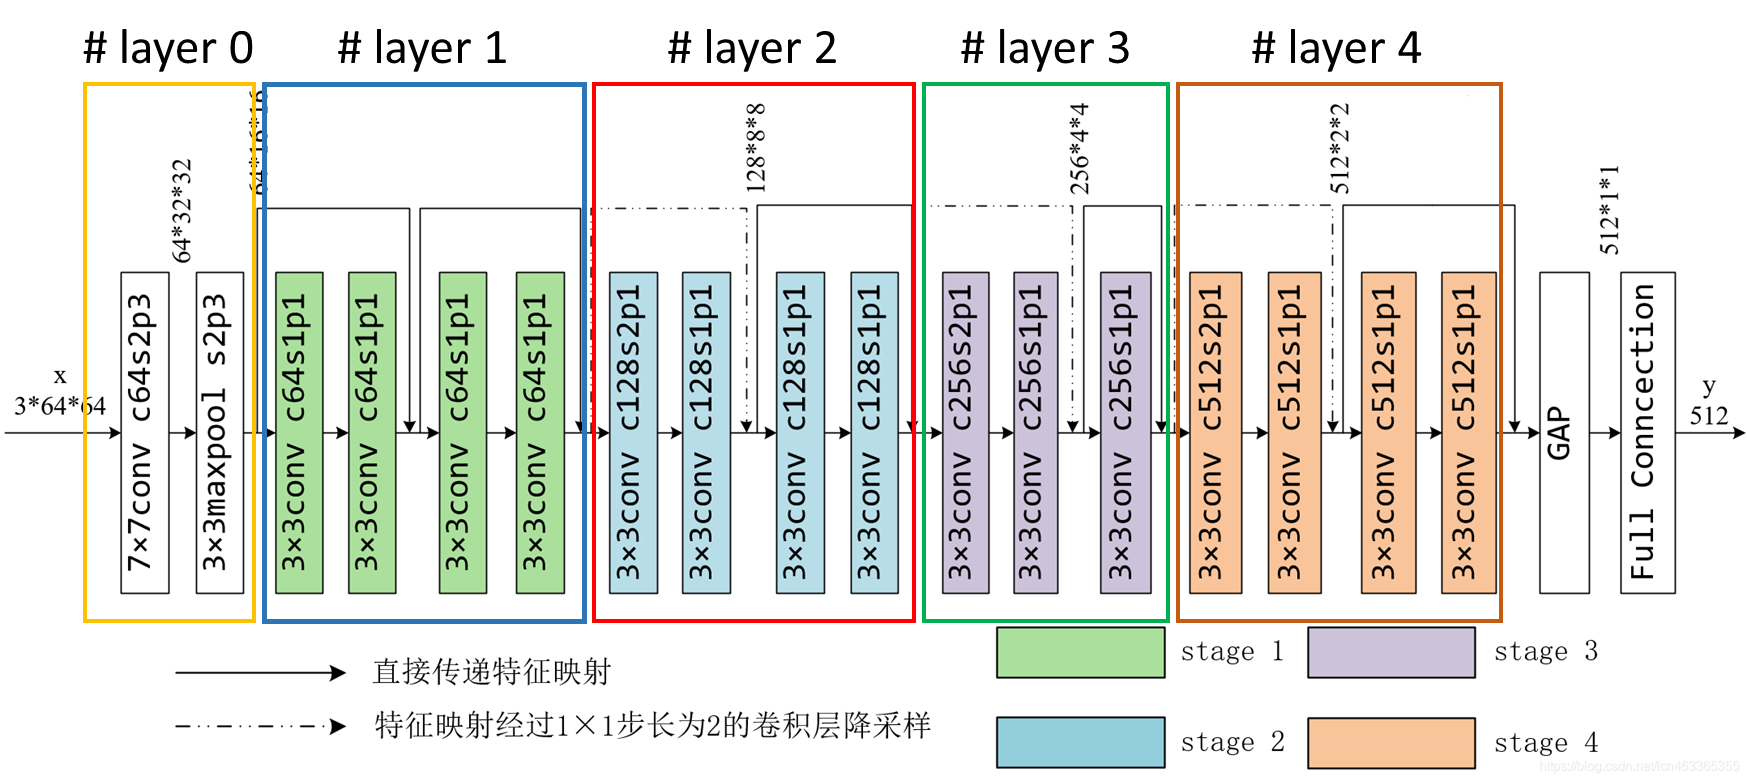
圖片來源: https://blog.csdn.net/lcn463365355/article/details/92846776


本篇ResNet寫法為最蠢的方式，一行一行手刻的方式進行，但這樣的方式更容易讓大家進行模型理解和學習。<br>

我手刻的模型，在下採樣(將特徵圖片解析降低的過程)我採用conv $1 \times 1$(stride=2)的方式進行。

In [1]:
import torch
from torch import Tensor
import torch.nn as nn

def conv3x3(in_planes: int, out_planes: int, stride: int = 1, groups: int = 1, dilation: int = 1) -> nn.Conv2d:
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=dilation, groups=groups, bias=False, dilation=dilation)

def conv1x1(in_planes: int, out_planes: int, stride: int = 1) -> nn.Conv2d:
    """1x1 convolution"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)

class myRESNET18(nn.Module):
    def __init__(self, num_classes=10):
        super(myRESNET18, self).__init__()
        # _resnet('resnet18', BasicBlock, [2, 2, 2, 2])
        channel_ration = 1

        norm_layer = nn.BatchNorm2d
        outch =  int(64 * channel_ration)
        
        self.conv1 = nn.Conv2d(3, outch, kernel_size=7, stride=2, padding=3,
                               bias=False)
        self.bn1 = norm_layer(outch)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        # layer 1
        outch =  int(64 * channel_ration)
        self.l1_p1_conv1 = conv3x3(outch, outch, 1)
        self.l1_p1_bn1 = norm_layer(outch)
        self.l1_relu = nn.ReLU(inplace=True)
        self.l1_p1_conv2 = conv3x3(outch, outch)
        self.l1_p1_bn2 = norm_layer(outch)
        
        self.l1_p2_conv1 = conv3x3(outch, outch, 1)
        self.l1_p2_bn1 = norm_layer(outch)
        self.l1_p2_relu = nn.ReLU(inplace=True)
        self.l1_p2_conv2 = conv3x3(outch, outch)
        self.l1_p2_bn2 = norm_layer(outch)
        
         # layer 2
        inch =  int(64 * channel_ration)
        outch =  int(128 * channel_ration)
        self.downsample2 = nn.Sequential(
                conv1x1(inch, outch, 2),
                norm_layer(outch),
            )
        self.l2_p1_conv1 = conv3x3(inch, outch, 2)
        self.l2_p1_bn1 = norm_layer(outch)
        self.l2_relu = nn.ReLU(inplace=True)
        self.l2_p1_conv2 = conv3x3(outch, outch)
        self.l2_p1_bn2 = norm_layer(outch)
        
        self.l2_p2_conv1 = conv3x3(outch, outch, 1)
        self.l2_p2_bn1 = norm_layer(outch)
        self.l2_p2_relu = nn.ReLU(inplace=True)
        self.l2_p2_conv2 = conv3x3(outch, outch)
        self.l2_p2_bn2 = norm_layer(outch)
        
        # layer 3
        inch =  int(128 * channel_ration)
        outch =  int(256 * channel_ration)
        self.downsample3 = nn.Sequential(
                conv1x1(inch, outch, 2),
                norm_layer(outch),
            )    
        self.l3_p1_conv1 = conv3x3(inch, outch, 2)
        self.l3_p1_bn1 = norm_layer(outch)
        self.l3_relu = nn.ReLU(inplace=True)
        self.l3_p1_conv2 = conv3x3(outch, outch)
        self.l3_p1_bn2 = norm_layer(outch)
        
        self.l3_p2_conv1 = conv3x3(outch, outch, 1)
        self.l3_p2_bn1 = norm_layer(outch)
        self.l3_p2_relu = nn.ReLU(inplace=True)
        self.l3_p2_conv2 = conv3x3(outch, outch)
        self.l3_p2_bn2 = norm_layer(outch)
        
        # layer 4
        inch =  int(256 * channel_ration)
        outch =  int(512 * channel_ration)
        self.downsample4 = nn.Sequential(
                conv1x1(inch, outch, 2),
                norm_layer(outch),
            )     
        self.l4_p1_conv1 = conv3x3(inch, outch, 2)
        self.l4_p1_bn1 = norm_layer(outch)
        self.l4_relu = nn.ReLU(inplace=True)
        self.l4_p1_conv2 = conv3x3(outch, outch)
        self.l4_p1_bn2 = norm_layer(outch)
        
        self.l4_p2_conv1 = conv3x3(outch, outch, 1)
        self.l4_p2_bn1 = norm_layer(outch)
        self.l4_p2_relu = nn.ReLU(inplace=True)
        self.l4_p2_conv2 = conv3x3(outch, outch)
        self.l4_p2_bn2 = norm_layer(outch)
               
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(outch , num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def forward(self, x):    
        # layer 0 (scale: 1 -> 1/4)
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
                
        # layer 1 (scale: 1/4 -> 1/4)
        identity11 = x
        x = self.l1_p1_conv1(x)
        x = self.l1_p1_bn1(x)
        x = self.l1_relu(x)
        x = self.l1_p1_conv2(x)
        x = self.l1_p1_bn2(x)
        x += identity11
        x = self.l1_relu(x)
        
        identity12 = x
        x = self.l1_p2_conv1(x)
        x = self.l1_p2_bn1(x)
        x = self.l1_p2_relu(x)
        x = self.l1_p2_conv2(x)
        x = self.l1_p2_bn2(x)
        x += identity12
        x = self.l1_p2_relu(x)
        
        # layer 2 (scale: 1/4 -> 1/8)
        identity21 = self.downsample2(x)
        x = self.l2_p1_conv1(x)
        x = self.l2_p1_bn1(x)
        x = self.l2_relu(x)
        x = self.l2_p1_conv2(x)
        x = self.l2_p1_bn2(x)
        x += identity21
        x = self.l2_relu(x)
        
        identity22 = x
        x = self.l2_p2_conv1(x)
        x = self.l2_p2_bn1(x)
        x = self.l2_p2_relu(x)
        x = self.l2_p2_conv2(x)
        x = self.l2_p2_bn2(x)
        x += identity22
        x = self.l2_p2_relu(x)
        
        
        # layer 3 (scale: 1/8 -> 1/16)
        identity31 = self.downsample3(x)
        x = self.l3_p1_conv1(x)
        x = self.l3_p1_bn1(x)
        x = self.l3_relu(x)
        x = self.l3_p1_conv2(x)
        x = self.l3_p1_bn2(x)
        x += identity31
        x = self.l3_relu(x)
        
        identity32 = x
        x = self.l3_p2_conv1(x)
        x = self.l3_p2_bn1(x)
        x = self.l3_p2_relu(x)
        x = self.l3_p2_conv2(x)
        x = self.l3_p2_bn2(x)
        x += identity32
        x = self.l3_p2_relu(x)
        
        # layer 4 (scale: 1/16 -> 1/32)
        identity41 = self.downsample4(x)
        x = self.l4_p1_conv1(x)
        x = self.l4_p1_bn1(x)
        x = self.l4_relu(x)
        x = self.l4_p1_conv2(x)
        x = self.l4_p1_bn2(x)
        x += identity41
        x = self.l4_relu(x)
        
        identity42 = x
        x = self.l4_p2_conv1(x)
        x = self.l4_p2_bn1(x)
        x = self.l4_p2_relu(x)
        x = self.l4_p2_conv2(x)
        x = self.l4_p2_bn2(x)
        x += identity42
        x = self.l4_p2_relu(x) # b * 512 * 7 * 7
        
        x = self.avgpool(x) #  b * 512 * 1 * 1
        x = x.view(x.size(0), -1) # b * 512
        x = self.fc(x) # input: b * in_channel; output: b * out_channel
        return x
    

將模型ONNX來存出模型，後續不論是Inference或是看模型結構都可以用匯出的onnx檔案。<br>

Pytorch有內建生成onnx檔案的方式，產生方式見下程式碼。

In [4]:
restnet18_ = myRESNET18(num_classes=10)
print(restnet18_)
dummy_input = torch.randn(1, 3, 224, 224)
out = restnet18_(dummy_input)
torch.onnx.export(restnet18_, dummy_input, "restnet18_.onnx", opset_version=11)

myRESNET18(
  (conv1): Conv2d(3, 6, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (l1_p1_conv1): Conv2d(6, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (l1_p1_bn1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (l1_relu): ReLU(inplace=True)
  (l1_p1_conv2): Conv2d(6, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (l1_p1_bn2): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (l1_p2_conv1): Conv2d(6, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (l1_p2_bn1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (l1_p2_relu): ReLU(inplace=True)
  (l1_p2_conv2): Conv2d(6, 6, kernel_size=(3, 3), stride=(1, 1), pad

### 模型可視化可以利用Netron的網頁來觀察
Netron: https://netron.app/
<br>
https://github.com/lutzroeder/netron

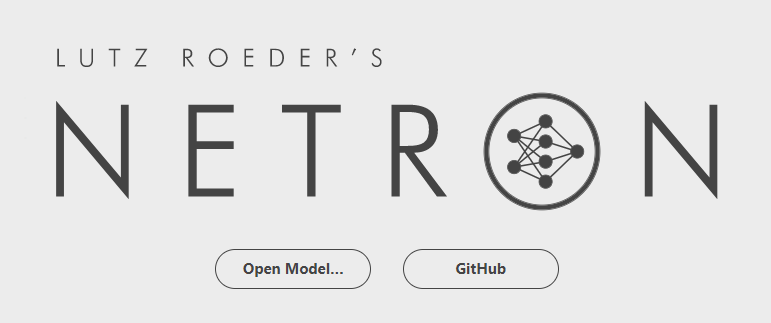


### 利用我們建立的ResNet-18來訓練CIFAR-10資料

>1. 設定hyperparameter: batch size，epoch size等等<br>

>2. 宣告 dataset和dataloader<br>

>3. 宣告模型: myRESNET18<br>

>4. Loss Function: 因為為分類任務採用Cross ENtropy<br>

>5. optimizer: torch.optim.SGD<br>
scheduler: MultiStepLR


In [3]:
from torchvision import datasets, transforms

use_cuda = 1
device = torch.device("cuda" if (torch.cuda.is_available() & use_cuda) else "cpu")
print(device)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

mytransform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
            ])
#1. 設定hyperparameter: batch size，epoch size等等
n_batch=1024
total_epoch = 150
milestones=[30,60,90,120]

# 2.宣告 dataset和dataloader
dataset_train = datasets.CIFAR10(root='./dataset', train=True,  download=True, transform=mytransform)
dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=n_batch, num_workers=0, shuffle=True)
testset = datasets.CIFAR10(root='./dataset', train=False, download=True, transform=mytransform)
testloader = torch.utils.data.DataLoader(testset, batch_size=n_batch, shuffle=False)

#3. 宣告模型: myRESNET18
model = myRESNET18(num_classes=10).to(device)

#4. Loss Function: 因為為分類任務採用Cross ENtropy<br>
criterion = torch.nn.CrossEntropyLoss().to(device)

#5. optimizer: torch.optim.SGD
#   scheduler: MultiStepLR
optimizer = torch.optim.SGD(model.parameters(), lr=0.01,momentum=0.9)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestones, gamma=0.5)



cuda
Files already downloaded and verified
Files already downloaded and verified


直接將整個訓練包成一個函數
```
def train(model, optimizer,dataloader_train, testloader, loss, total_epoch, scheduler)
```

In [4]:
def evalmodel(model, testloader, loss):
    model.eval()
    test_loss_cnn = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(testloader):
            data, target = data.to(device), target.to(device)
            output_cnn = model(data)
            loss_cnn = loss(output_cnn,target)  
            test_loss_cnn += loss_cnn
            _, predicted = torch.max(output_cnn.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
        # the class with the highest energy is what we choose as prediction

    test_loss_cnn /= len(testloader.dataset)
    acc = 100 * correct / total
    return test_loss_cnn.cpu().detach().numpy(), acc

def train(model, optimizer,dataloader_train, testloader, loss, total_epoch, scheduler):
    log_loss_train=[]
    log_loss_test=[]
    
    for epoch in range(total_epoch):
        # train
        model.train()
        train_loss_cnn = 0
        for batch_idx, (data, target) in enumerate(dataloader_train):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output_cnn = model(data)
            loss_cnn = loss(output_cnn,target)  
            train_loss_cnn += loss_cnn
            loss_cnn.backward()
            optimizer.step()
        train_loss_cnn /= len(dataloader_train.dataset)
        scheduler.step()
    
        if epoch % 10 == 0:
            train_loss, train_acc= evalmodel(model, dataloader_train, loss)
            test_loss, test_acc= evalmodel(model, testloader, loss)
            
            log_loss_train.append(train_loss)
            log_loss_test.append(test_loss)
            print('learning rate:{}'.format(scheduler.get_last_lr()[0]))
            print('CNN[epoch: [{}/{}], Average loss (Train):{:.5f}, Average loss (test):{:.5f}, acc(train):{:.4f}, acc(test):{:.4f}'.format(
                epoch+1, total_epoch, train_loss, test_loss, train_acc, test_acc))
                      
    print('CNN[epoch: [{}/{}], Average loss (Train):{:.5f}, Average loss (test):{:.5f}, acc(train):{:.4f}, acc(test):{:.4f}'.format(
                epoch+1, total_epoch, train_loss, test_loss, train_acc, test_acc))
    print('training done.')
    return log_loss_train, log_loss_test

CNN模型開始訓練

In [5]:
print('*'*50)
print('Training....')
loss_log_rain, loss_log_test = train(model, optimizer, dataloader_train, testloader, criterion, total_epoch=total_epoch, scheduler=scheduler)

**************************************************
Training....
learning rate:0.01
CNN[epoch: [1/150], Average loss (Train):0.00184, Average loss (test):0.00188, acc(train):31.2520, acc(test):31.3800
learning rate:0.01
CNN[epoch: [11/150], Average loss (Train):0.00134, Average loss (test):0.00143, acc(train):50.8280, acc(test):48.5800
learning rate:0.01
CNN[epoch: [21/150], Average loss (Train):0.00115, Average loss (test):0.00134, acc(train):57.7340, acc(test):52.0400
learning rate:0.005
CNN[epoch: [31/150], Average loss (Train):0.00101, Average loss (test):0.00133, acc(train):63.5120, acc(test):53.4500
learning rate:0.005
CNN[epoch: [41/150], Average loss (Train):0.00095, Average loss (test):0.00138, acc(train):65.7580, acc(test):52.4700
learning rate:0.005
CNN[epoch: [51/150], Average loss (Train):0.00087, Average loss (test):0.00142, acc(train):68.5880, acc(test):52.2500
learning rate:0.0025
CNN[epoch: [61/150], Average loss (Train):0.00079, Average loss (test):0.00146, acc(train):

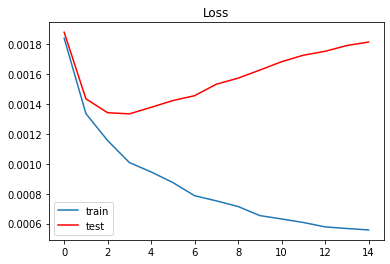

In [6]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(loss_log_rain)
plt.plot(loss_log_test,'r')
plt.legend(['train','test'])
plt.title('Loss')
plt.show()

### 小結論

模型如果越複雜，資料的變異不夠，越容易產生overfitting的問題。<br>

先不管training tricks的方式來避免overfitting的問題。<br>

最簡單的方式就是使用Data Augumention進行資料增強的方式，增加資料的變異避免overfitting的問題發生。<br>

------------------
## 如果我不想自己兜模型，可以用內建的模型嗎?

答案是可以的唷<br>

## 2. Torchvision匯入常見的模型。

請參閱:https://pytorch.org/vision/stable/models.html

只要用下列範例程式:在參數帶入<br>
```pretrained = True```:則會下載訓練好ImageNet資料庫的預模型，帶入。<br>
```pretrained=False```:只幫你建立好模型架構，權重是隨機產生的。<br>

In [5]:
import torch
import torchvision.models as models

restnet18_modelzoo = models.resnet18(pretrained=True)
# alexnet = models.alexnet(pretrained=False)
# squeezenet = models.squeezenet1_0(pretrained=False)
# vgg16 = models.vgg16(pretrained=False)
# densenet = models.densenet161(pretrained=False)
# inception = models.inception_v3(pretrained=False)
# googlenet = models.googlenet(pretrained=False)
# shufflenet = models.shufflenet_v2_x1_0(pretrained=False)
# mobilenet_v2 = models.mobilenet_v2(pretrained=True)
# mobilenet_v3_large = models.mobilenet_v3_large(pretrained=False)
# mobilenet_v3_small = models.mobilenet_v3_small(pretrained=False)
# resnext50_32x4d = models.resnext50_32x4d(pretrained=False)
# wide_resnet50_2 = models.wide_resnet50_2(pretrained=False)
# mnasnet = models.mnasnet1_0(pretrained=False)

# print(restnet18_modelzoo)
dummy_input = torch.randn(1, 3, 224, 224)
out = restnet18_modelzoo(dummy_input)
torch.onnx.export(restnet18_modelzoo, dummy_input, "restnet18_modelzoo.onnx", opset_version=11)


利用torchvision下載來的pretrain權重來訓練CIFAR-10模型。

In [9]:
n_batch=256
total_epoch = 20
milestones=[10,15]
restnet18_modelzoo = models.resnet18(pretrained=True)
optimizer = torch.optim.SGD(restnet18_modelzoo.parameters(), lr=0.001,momentum=0.9)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestones, gamma=0.1)
loss_log_rain, loss_log_test = train(model, optimizer, dataloader_train, testloader, criterion, total_epoch=total_epoch, scheduler=scheduler)

learning rate:0.001
CNN[epoch: [1/20], Average loss (Train):0.00053, Average loss (test):0.00184, acc(train):82.2620, acc(test):50.4500
learning rate:0.0001
CNN[epoch: [11/20], Average loss (Train):0.00053, Average loss (test):0.00184, acc(train):82.3160, acc(test):50.4100
CNN[epoch: [20/20], Average loss (Train):0.00053, Average loss (test):0.00184, acc(train):82.3160, acc(test):50.4100
training done.


Reference: https://github.com/TommyHuang821/PytorchTutorial
